In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
np.random.seed(42)
n_students = 5000

In [96]:
data = {
    "study_hours": np.random.randint(1, 10, n_students),                # hours/day
    "sleep_hours": np.random.randint(4, 9, n_students),                 # hours/day
    "screen_time": np.random.randint(2, 10, n_students),                # hours/day
    "attendance": np.random.randint(60, 100, n_students),               # %
    "assignment_load": np.random.randint(1, 6, n_students),             # scale 1–5
    "physical_activity": np.random.randint(0, 6, n_students),           # hours/week
    "social_interaction": np.random.randint(1, 6, n_students),          # scale 1–5
    "relationship_status": np.random.randint(0, 4, n_students),         # 0–3
    "relationship_satisfaction": np.random.randint(0, 6, n_students),   # 0–5
    # Substance type:
    # Substance usage (multi-label)
    "alcohol_use": np.random.binomial(1, 0.4, n_students),
    "smoking_use": np.random.binomial(1, 0.3, n_students),
    "weed_use": np.random.binomial(1, 0.25, n_students)
}
df = pd.DataFrame(data)

In [97]:
df["substance_frequency"] = 0
mask = (df["alcohol_use"] + df["smoking_use"] + df["weed_use"]) > 0
df.loc[mask, "substance_frequency"] = np.random.randint(1, 3, mask.sum())

In [98]:
df.head()

,study_hours,sleep_hours,screen_time,attendance,assignment_load,physical_activity,social_interaction,relationship_status,relationship_satisfaction,alcohol_use,smoking_use,weed_use,substance_frequency
0,8,5,7,65,5,5,1,2,5,1,0,1,2
1,5,7,7,80,3,1,3,0,2,1,1,0,2
2,4,8,4,82,2,0,2,1,3,0,1,0,2
3,9,6,3,95,4,4,1,3,4,0,0,0,0
4,4,8,3,77,3,3,5,1,3,1,1,0,1


In [99]:
def assign_stress(row):
    stress = 0

    # Academics
    if row["study_hours"] > 7:
        stress += 2
    if row["assignment_load"] > 3:
        stress += 1
    if row["attendance"] < 75:
        stress += 1

    # Lifestyle
    if row["sleep_hours"] < 6:
        stress += 2
    if row["screen_time"] > 6:
        stress += 1
    if row["physical_activity"] < 2:
        stress += 1
    if row["social_interaction"] < 3:
        stress += 1

    # Relationships
    if row["relationship_status"] in [1, 3]:
        stress += 1
    if row["relationship_status"] == 2:
        if row["relationship_satisfaction"] <= 2:
            stress += 2
        elif row["relationship_satisfaction"] <= 4:
            stress += 1

    # Substance impact (type + frequency)
    substance_count = (
        row["alcohol_use"] +
        row["smoking_use"] +
        row["weed_use"]
    )

    if substance_count > 0:
        stress += row["substance_frequency"]  # Occasional=1, Frequent=2

        if substance_count >= 2:
            stress += 1  # extra penalty for multiple substances

    if stress <= 3:
        return "Low"
    elif stress <= 6:
        return "Medium"
    else:
        return "High"

df["stress_level"] = df.apply(assign_stress, axis=1)
df.head()

,study_hours,sleep_hours,screen_time,attendance,assignment_load,physical_activity,social_interaction,relationship_status,relationship_satisfaction,alcohol_use,smoking_use,weed_use,substance_frequency,stress_level
0,8,5,7,65,5,5,1,2,5,1,0,1,2,High
1,5,7,7,80,3,1,3,0,2,1,1,0,2,Medium
2,4,8,4,82,2,0,2,1,3,0,1,0,2,Medium
3,9,6,3,95,4,4,1,3,4,0,0,0,0,Medium
4,4,8,3,77,3,3,5,1,3,1,1,0,1,Low


In [100]:
df["stress_level"].value_counts()

stress_level
Medium    2695
High      1292
Low       1013
Name: count, dtype: int64

In [101]:
X = df.drop("stress_level", axis=1)
y = df["stress_level"]

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
model = RandomForestClassifier(n_estimators=300,max_depth=12,random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [107]:
y_pred = model.predict(X_test)
y_pred

array([2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,

In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=le.classes_))
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",cm)

Accuracy: 0.856
Classification Report:
               precision    recall  f1-score   support

        High       0.89      0.79      0.84       258
         Low       0.94      0.73      0.82       203
      Medium       0.82      0.94      0.88       539

    accuracy                           0.86      1000
   macro avg       0.88      0.82      0.84      1000
weighted avg       0.86      0.86      0.85      1000

Confusion Matrix : 
 [[204   0  54]
 [  0 148  55]
 [ 25  10 504]]


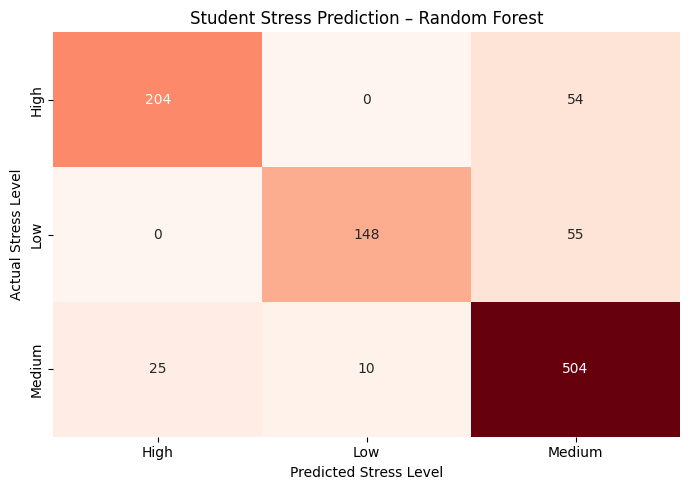

In [109]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds",xticklabels=le.classes_,yticklabels=le.classes_ ,cbar=False)
plt.xlabel("Predicted Stress Level")
plt.ylabel("Actual Stress Level")
plt.title("Student Stress Prediction – Random Forest")
plt.tight_layout()
plt.show()

In [110]:
feature_importance = pd.Series(model.feature_importances_,index=X.columns).sort_values()

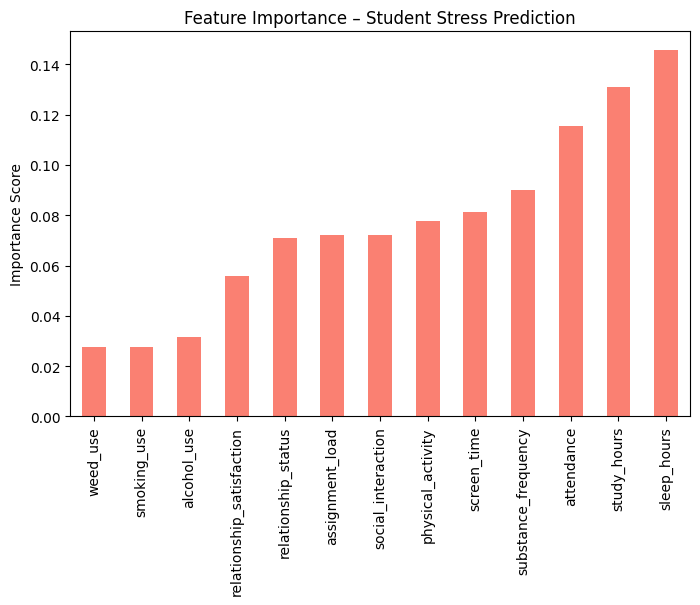

In [111]:
plt.figure(figsize=(8,5))
feature_importance.plot(kind="bar", color="#FA8072")
plt.title("Feature Importance – Student Stress Prediction")
plt.ylabel("Importance Score")
plt.show()

In [130]:
def explain_stress(sample):
    reasons = []

    # Academics
    if sample["study_hours"] > 7:
        reasons.append("High study workload")
    if sample["assignment_load"] > 3:
        reasons.append("Heavy assignment load")
    if sample["attendance"] < 75:
        reasons.append("Low attendance pressure")

    # Lifestyle
    if sample["sleep_hours"] < 6:
        reasons.append("Insufficient sleep")
    if sample["screen_time"] > 6:
        reasons.append("Excessive screen time")
    if sample["physical_activity"] < 2:
        reasons.append("Low physical activity")
    if sample["social_interaction"] < 3:
        reasons.append("Low social interaction")

    # Relationships
    # Relationship reasoning
    if sample["relationship_status"] == 1:  # Talking / situationship
        reasons.append("Uncertain talking / situationship phase")

    elif sample["relationship_status"] == 3:  # Casual / hookup
        if sample["relationship_satisfaction"] <= 2:
            reasons.append("Unsatisfying casual relationship")
        else:
            pass  # Happy casual relationship → no stress reason

    elif sample["relationship_status"] == 2:  # Serious relationship
        if sample["relationship_satisfaction"] <= 2:
            reasons.append("Low satisfaction in committed relationship")
    elif sample["relationship_satisfaction"] <= 4:
        reasons.append("Moderate relationship stress")


    # Substance use
    # Substance reasoning (real-world accurate)
    if sample["substance_frequency"] == 2:  # Frequent
        reasons.append("Frequent substance use affecting daily routine")

    elif sample["substance_frequency"] == 1:
    # Only mention if lifestyle is already poor
        if sample["sleep_hours"] < 6 or sample["attendance"] < 75:
            reasons.append("Occasional substance use combined with poor routine")

    # Multiple substances → ONLY if frequent
    substance_count = (sample["alcohol_use"] +sample["smoking_use"] +sample["weed_use"])
    if substance_count >= 2 and sample["substance_frequency"] == 2:
        reasons.append("Frequent use of multiple substances increasing stress risk")


    return reasons

In [131]:
def predict_stress():
    print("\nEnter student details:")

    relationship_status = int(input(
        "Relationship status (0=Single, 1=Talking/Situationship, 2=Committed(Serious), 3=Casual/Hookup): "
    ))

    relationship_satisfaction = 0
    if relationship_status != 0:
        relationship_satisfaction = int(input("Relationship satisfaction (1-5): "))

    alcohol_use = int(input("Alcohol use? (0=No, 1=Yes): "))
    smoking_use = int(input("Smoking use? (0=No, 1=Yes): "))
    weed_use = int(input("Weed use? (0=No, 1=Yes): "))

    substance_frequency = 0
    if alcohol_use or smoking_use or weed_use:
        substance_frequency = int(input("Substance frequency (1=Occasional, 2=Frequent): "))

    sample = {
        "study_hours": int(input("Study hours per day: ")),
        "sleep_hours": int(input("Sleep hours per day: ")),
        "screen_time": int(input("Screen time (hours/day): ")),
        "attendance": int(input("Attendance (%): ")),
        "assignment_load": int(input("Assignment load (1-5): ")),
        "physical_activity": int(input("Physical activity (hours/week): ")),
        "social_interaction": int(input("Social interaction (1-5): ")),

        "relationship_status": relationship_status,
        "relationship_satisfaction": relationship_satisfaction,

        "alcohol_use": alcohol_use,
        "smoking_use": smoking_use,
        "weed_use": weed_use,
        "substance_frequency": substance_frequency
    }

    sample_df = pd.DataFrame([sample])

    pred = model.predict(sample_df)[0]
    pred_label = le.inverse_transform([pred])[0]

    print("\nPredicted Stress Level:", pred_label)

    reasons = explain_stress(sample)
    if reasons:
        print("\nPossible contributing factors:")
        for r in reasons:
            print("•", r)


In [132]:
predict_stress()


Enter student details:


Relationship status (0=Single, 1=Talking/Situationship, 2=Committed(Serious), 3=Casual/Hookup):  1
Relationship satisfaction (1-5):  3
Alcohol use? (0=No, 1=Yes):  1
Smoking use? (0=No, 1=Yes):  1
Weed use? (0=No, 1=Yes):  0
Substance frequency (1=Occasional, 2=Frequent):  1
Study hours per day:  5
Sleep hours per day:  12
Screen time (hours/day):  7
Attendance (%):  55
Assignment load (1-5):  3
Physical activity (hours/week):  3
Social interaction (1-5):  3



Predicted Stress Level: Medium

Possible contributing factors:
• Low attendance pressure
• Excessive screen time
• Uncertain talking / situationship phase
• Occasional substance use combined with poor routine


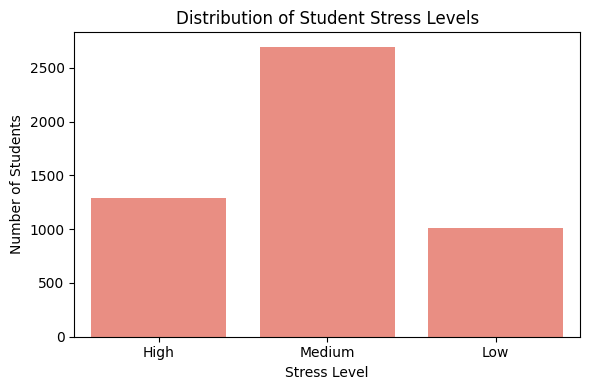

In [133]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["stress_level"],color="#FA8072")
plt.title("Distribution of Student Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

In [134]:
import joblib
joblib.dump(model, "stress_model.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']